In [116]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
np.set_printoptions(precision=4)
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,f1_score
import warnings
warnings.filterwarnings('ignore')
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/company-bankruptcy-prediction/data.csv


In [117]:
df=pd.read_csv('/kaggle/input/company-bankruptcy-prediction/data.csv')

In [118]:
df.head(5)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [120]:
data=df['Bankrupt?'].value_counts()

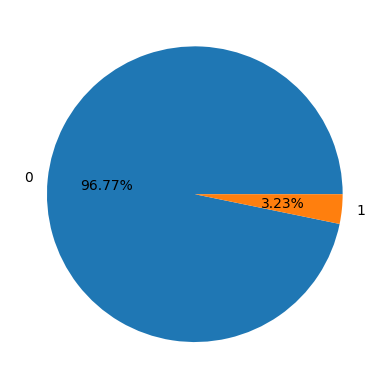

In [121]:
plt.pie(data,autopct='%.2f%%',labels=data.index)
plt.show()

In [122]:
x=df.drop(['Bankrupt?'],axis=1)

In [123]:
x.columns

Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit Growth Rate'

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
y=df['Bankrupt?']

In [126]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1234)

In [127]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=1234)
x_smote,y_smote=sm.fit_resample(x_train,y_train)
print(f'''Shape of x before SMOTE: {x.shape}
Shape of x after smote: {x_smote.shape}''')


Shape of x before SMOTE: (6819, 95)
Shape of x after smote: (9236, 95)


In [128]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x_smote=sc.fit_transform(x_smote)
x_test=sc.transform(x_test)

In [129]:
# import ML libraries
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression



In [135]:
classifiers =[[CatBoostClassifier(verbose=0),'CatBoostClassifier'],[XGBClassifier(),'XGB Classifier'],[RandomForestClassifier(),'Random Forest Classifier'],[KNeighborsClassifier(),'K-Nearedt Neighbors'],[SGDClassifier(),'SGD Classifier'],[SVC(),'SVC'],[LGBMClassifier(),'LGBM Classifier'],[GaussianNB(),'GaussianNB'],[DecisionTreeClassifier(),'Decision Tree Classifier'],[LogisticRegression
(),'Logistic Regression']]

In [136]:
for cls in classifiers:
    model=cls[0]
    model.fit(x_smote, y_smote)
    y_pred=model.predict(x_test)
    print(cls[1])
    print('Confusion Matrix:')
    print(confusion_matrix(y_test,y_pred) )
    print("Accuracy: ",accuracy_score(y_test,y_pred) * 100)
    print("Recall: " ,recall_score(y_test,y_pred) *100)
    print("F1:",f1_score(y_test,y_pred) *100)
    

CatBoostClassifier
Confusion Matrix:
[[1931   50]
 [  31   34]]
Accuracy:  96.04105571847508
Recall:  52.307692307692314
F1: 45.63758389261746
XGB Classifier
Confusion Matrix:
[[1931   50]
 [  32   33]]
Accuracy:  95.99217986314761
Recall:  50.76923076923077
F1: 44.59459459459459
Random Forest Classifier
Confusion Matrix:
[[1917   64]
 [  29   36]]
Accuracy:  95.45454545454545
Recall:  55.38461538461539
F1: 43.63636363636363
K-Nearedt Neighbors
Confusion Matrix:
[[1780  201]
 [  25   40]]
Accuracy:  88.95405669599218
Recall:  61.53846153846154
F1: 26.143790849673206
SGD Classifier
Confusion Matrix:
[[1702  279]
 [  20   45]]
Accuracy:  85.386119257087
Recall:  69.23076923076923
F1: 23.136246786632395
SVC
Confusion Matrix:
[[1855  126]
 [  25   40]]
Accuracy:  92.61974584555229
Recall:  61.53846153846154
F1: 34.63203463203464
[LightGBM] [Info] Number of positive: 4618, number of negative: 4618
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011916